In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
df = pd.read_csv("../input/feedback-prize-effectiveness/train.csv")
df.head(5)

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about how this face on Mars is a natural landform or if there is life on Mars that made it. The story is about how NASA took a picture of Mars and a face was seen on the planet. NASA doesn't know if the landform was created by life on Mars, or if it is just a natural landform.",Lead,Adequate
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a natural landform because I dont think that there is any life on Mars. In these next few paragraphs, I'll be talking about how I think that is is a natural landform",Position,Adequate
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform because there is no life on Mars that we have descovered yet,Claim,Adequate
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The reason why I think it is a natural landform because, nobody live on Mars in order to create the figure. It says in paragraph 9, ""It's not easy to target Cydonia,"" in which he is saying that its not easy to know if it is a natural landform at this point. In all that they're saying, its probably a natural landform.",Evidence,Adequate
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by alieans because they thought that there was life on Mars.,Counterclaim,Adequate


In [3]:
LABEL_MAPPING = {"Ineffective": 0, "Adequate": 1, "Effective": 2}

df['label'] = df["discourse_effectiveness"].apply(lambda x: LABEL_MAPPING[x])

In [4]:
df.head(5)

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,label
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about how this face on Mars is a natural landform or if there is life on Mars that made it. The story is about how NASA took a picture of Mars and a face was seen on the planet. NASA doesn't know if the landform was created by life on Mars, or if it is just a natural landform.",Lead,Adequate,1
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a natural landform because I dont think that there is any life on Mars. In these next few paragraphs, I'll be talking about how I think that is is a natural landform",Position,Adequate,1
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform because there is no life on Mars that we have descovered yet,Claim,Adequate,1
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The reason why I think it is a natural landform because, nobody live on Mars in order to create the figure. It says in paragraph 9, ""It's not easy to target Cydonia,"" in which he is saying that its not easy to know if it is a natural landform at this point. In all that they're saying, its probably a natural landform.",Evidence,Adequate,1
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by alieans because they thought that there was life on Mars.,Counterclaim,Adequate,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36765 entries, 0 to 36764
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   discourse_id             36765 non-null  object
 1   essay_id                 36765 non-null  object
 2   discourse_text           36765 non-null  object
 3   discourse_type           36765 non-null  object
 4   discourse_effectiveness  36765 non-null  object
 5   label                    36765 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.7+ MB


In [6]:
df.describe(include="all")

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,label
count,36765,36765,36765,36765,36765,36765.000000
unique,36765,4191,36691,7,3,NaN
top,0013cc385424,91B1F82B2CF1,Summer projects should be student-designed,Evidence,Adequate,NaN
freq,1,23,14,12105,20977,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.077900
std,NaN,NaN,NaN,NaN,NaN,0.650671
min,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,NaN,2.000000


In [7]:
#Find duplicates
def highlight_duplicate(val):
    if val.discourse_text == "Big States ":
        return ['background-color : yellow'] * len(val)
    else:
        return ['background-color: white']*len(val) 
duplicates = df[df.discourse_text.duplicated(keep=False)].sort_values(by="discourse_text")
duplicates.head(10).style.apply(highlight_duplicate, axis=1)

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,label
26691,7f9c3500259d,A602D45D22B2,"""That's a lava dome that takes the form of an isolated mesa about the same height as the Face on Mars.""",Evidence,Adequate,1
27350,d628a6adda3a,ADB68BCD2874,"""That's a lava dome that takes the form of an isolated mesa about the same height as the Face on Mars.""",Evidence,Adequate,1
25391,781452d9404c,942ECB176B3A,"At the most basic level, the electoral college is unfair to voters.",Position,Adequate,1
28835,6fa171a95540,C2BAF4ADA2CA,"At the most basic level, the electoral college is unfair to voters.",Claim,Adequate,1
28436,9e12ec699196,BB3A6C2D0B65,Big States,Claim,Adequate,1
20121,35bf70c4a673,4CA37D113612,Big States,Claim,Ineffective,0
3933,c5b2ecb3888e,44E2726DA1B3,I agree,Position,Adequate,1
11285,5e4022e93247,CB66B685DAF6,I agree,Position,Adequate,1
17087,99782ca26927,2714214F7D9E,I think students should be required to perform community service.,Position,Adequate,1
29590,33d6bbba823c,CE64FA08E4CF,I think students should be required to perform community service.,Position,Adequate,1


In [8]:
#find duplicates that has different discourse_effectiveness 
true_duplicates = duplicates.groupby(["discourse_type", "discourse_text"]).discourse_effectiveness.nunique().to_frame()
true_duplicates.columns = ["nunique_discourse_effectiveness"]
true_duplicates = true_duplicates[true_duplicates["nunique_discourse_effectiveness"] > 1].reset_index(drop=False)
true_duplicates

,discourse_type,discourse_text,nunique_discourse_effectiveness
0,Claim,Big States,2
1,Claim,"Second, there could be a tie in the electoral vote.",2
2,Claim,The Electoral College is unfair,2
3,Claim,"be creative,",2
4,Claim,"opinions,",2
5,Claim,you can help others.,2
6,Counterclaim,Opponents say that cell phones are good because they give an opportunity to make a call in case of emergency.,2
7,Lead,"When people ask for advice, they sometimes talk to more than one person.",2
8,Position,I would want to keep the Electoral College,2
9,Position,Seeking multiple opinions can help someone make a better choice,2


In [9]:
duplicates = duplicates[duplicates.discourse_text.isin(true_duplicates.discourse_text.unique())]
duplicates

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,label
28436,9e12ec699196,BB3A6C2D0B65,Big States,Claim,Adequate,1
20121,35bf70c4a673,4CA37D113612,Big States,Claim,Ineffective,0
20842,34b98386dc46,5729D5AE055C,I would want to keep the Electoral College,Position,Effective,2
28406,98154af4855d,BACC53ECC1FB,I would want to keep the Electoral College,Position,Adequate,1
11970,cc0dad1234ec,D8013F49DE51,Opponents say that cell phones are good because they give an opportunity to make a call in case of emergency.,Counterclaim,Adequate,1
6570,dee3f8aec4fc,7742D58270C9,Opponents say that cell phones are good because they give an opportunity to make a call in case of emergency.,Counterclaim,Ineffective,0
31753,b318a4e3b80e,EE2FC4219F49,"Second, there could be a tie in the electoral vote.",Claim,Effective,2
31757,43848fd5dfb3,EE2FC4219F49,"Second, there could be a tie in the electoral vote.",Claim,Adequate,1
35299,608e1d81f4ed,9627B47C10DE,Seeking multiple opinions can help someone make a better choice,Position,Effective,2
34383,3312a23a5480,523EBD9ECA47,Seeking multiple opinions can help someone make a better choice,Position,Adequate,1


In [19]:
#SIMPLE EDA
import matplotlib.pyplot as plt



In [17]:
x = df.discourse_type.value_counts().index
y = df.discourse_type.value_counts().values

<BarContainer object of 7 artists>

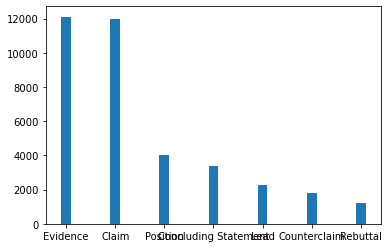

In [25]:
plt.bar(x,y, width = 0.4)